In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras


print(tf.__version__)
print(sys.version_info)

for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

2.0.0
sys.version_info(major=3, minor=7, micro=7, releaselevel='final', serial=0)
matplotlib 3.2.2
numpy 1.18.5
pandas 1.0.5
sklearn 0.21.2
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_valid,x_train =  x_train_all[:5000],x_train_all[5000:]
y_valid,y_train =  y_train_all[:5000],y_train_all[5000:]

In [3]:
# 对数据做标准化(归一化)
# x = (x - u)/std (u:均值,std:方差)

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

# 需要一个二维矩阵 x_train是三维的，要转成二维矩阵，再转成三维
# [None,28,28] ---> [None,784]
x_train_sacled = scalar.fit_transform(
x_train.astype(np.float32).reshape(-1,1)
).reshape(-1,28,28,1)

x_valid_scaled = scalar.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28,1)

x_test_scaled = scalar.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28,1)

In [4]:


model = keras.models.Sequential()

# 添加卷积层1
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding="same",
                              activation="selu",
                              input_shape=(28,28,1)
                            ))


model.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding="same",
                              activation="selu"
                            ))
model.add(keras.layers.MaxPool2D(pool_size=2))

# 添加卷积层2
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding="same",
                              activation="selu"
                            ))


model.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding="same",
                              activation="selu"
                            ))
model.add(keras.layers.MaxPool2D(pool_size=2))

# 添加卷积层1
model.add(keras.layers.Conv2D(filters=128, kernel_size=3, padding="same",
                              activation="selu"
                            ))


model.add(keras.layers.Conv2D(filters=128, kernel_size=3, padding="same",
                              activation="selu"
                            ))
model.add(keras.layers.MaxPool2D(pool_size=2))

# Flatten层用来将输入“压平”，即把多维的输入一维化，常用在从卷积层到全连接层的过渡。
model.add(keras.layers.Flatten())

# 全连接层
model.add(keras.layers.Dense(128,activation="selu"))

# 输出层
model.add(keras.layers.Dense(10,activation="softmax"))




#  计算交叉熵损失
# reasone for sparse: y是一个单纯的数字(index),要变成one_hot编码
# 如果y已经是一个向量了就用categorical_crossentropy
# loss：损失函数 交叉熵损失
# optmizer：优化器 sgd 越来越小
# metrics:验证指标
model.compile(loss="sparse_categorical_crossentropy",optmizer = "sgd",metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         7

In [5]:

logdir=os.path.join('cnn-selu-callbacks')

if not os.path.exists(logdir):
    os.mkdir(logdir)

outout_model_file = os.path.join(logdir,"fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(log_dir=logdir),
    keras.callbacks.ModelCheckpoint(outout_model_file,save_best_only=True),
    tf.keras.callbacks.EarlyStopping(min_delta=1e-3, patience=5)
]

history = model.fit(x_train_sacled,y_train,epochs=10,validation_data=(x_valid_scaled,y_valid),callbacks=callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 35s 629us/sample - loss: 0.4887 - accuracy: 0.8336 - val_loss: 0.3604 - val_accuracy: 0.8682
Epoch 2/10
55000/55000 [==============================] - 30s 549us/sample - loss: 0.3497 - accuracy: 0.8789 - val_loss: 0.3270 - val_accuracy: 0.8832
Epoch 3/10
55000/55000 [==============================] - 30s 549us/sample - loss: 0.3174 - accuracy: 0.8903 - val_loss: 0.3801 - val_accuracy: 0.8824
Epoch 4/10
55000/55000 [==============================] - 30s 550us/sample - loss: 0.3029 - accuracy: 0.8977 - val_loss: 0.3306 - val_accuracy: 0.8886
Epoch 5/10
55000/55000 [==============================] - 30s 549us/sample - loss: 0.2868 - accuracy: 0.9027 - val_loss: 0.3372 - val_accuracy: 0.8956
Epoch 6/10
55000/55000 [==============================] - 30s 550us/sample - loss: 0.2747 - accuracy: 0.9087 - val_loss: 0.3526 - val_accuracy: 0.8808
Epoch 7/10
55000/55000 [=====================

In [6]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

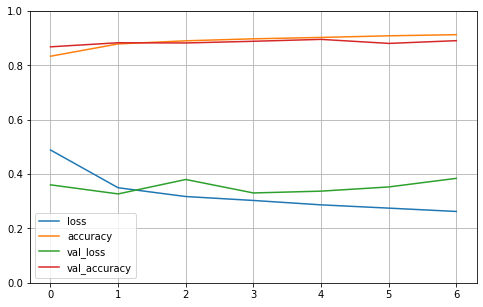

In [7]:
plot_learning_curves(history)

In [8]:
model.evaluate(x_test_scaled,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.4007505033016205, 0.8873]